# 5. Auto Encoders

Auto encoders compress input data into a limited number of features. In details:
* Unsupervised machine learning algorithm.
* Dimension reduction of the input data, comparable with PCA.
* Few nodes in the center indicate lower-dimensional feature space
* Similarly to PCA, we should be able to accurately generate the original data


<img src="./imgs/autoencoder.jpg" alt="autoencoder_schema" style="width: 600px;"/>

In [1]:
# loading packages
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K

seed = 123

def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Using TensorFlow backend.


In [2]:
# load mnist and data normalization
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

Note that x_train is a 3D numpy array:

In [3]:
print(f'data type: {type(x_train)}, data shape: {x_train.shape}')

data type: <class 'numpy.ndarray'>, data shape: (60000, 28, 28)


The 3D numpy array is rearranged and a picture is represented as a single vector (and not as a "matrix of pixels"):

In [4]:
# reshaping array from 3D to 2D
x_train = x_train.reshape(60000, 784)

### 5.1 Implementation

The following steps guide you in constructing and training your personal auto encoder for the MNIST dataset:
* Make a sketch of the neural network that you will implement
* Define a neural network with 5 layers:
    * Layer 1: input (784 nodes)
    * Layer 2: Hidden layer (128 nodes)
    * Layer 3: Hidden layer (32 nodes), this is the compressed feature space
    * Layer 4: Hidden layer (128 nodes)
    * Layer 5: Output layer (784 nodes)
* Choose an appropriate activation function for each layer:
    * identity
    * ReLU
    * sigmoid
    * softmax
* Which of these loss functions can we use to train the model?
    * mse
    * binary_crossentropy
    * categorical_crossentropy
* Fit the model on the MNIST data in 10 epochs.
* Experiment with adding other layer types to the model:
    * layer_gaussian_noise(stddev)
    * layer_dropout(rate)
    * layer_batch_normalization()


The Auto encoder can be implemented using both Keras [_Sequential API_](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) and [_Functional API_](https://www.tensorflow.org/guide/keras/functional). The latter allows for more flexibility when implementing complex models that include shared layers, multiple inputs, etc. We show both implementations. Note that _tf.keras.Sequential()_ and _tf.keras.models.Sequential()_ deploy the same functionality. The difference is due to package renaming when transitioning from version 1.x to 2.x.

### 5.1.1 Implementation via Sequential API

In [5]:
reset_random_seeds(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.keras.backend.set_session(session_conf)

# setting up autoencoder structure
autoencoder_sequential = tf.keras.models.Sequential() # or tf.keras.Sequential()
autoencoder_sequential.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid', input_shape = (784,)))
autoencoder_sequential.add(tf.keras.layers.Dense(units = 32, activation = 'sigmoid'))
autoencoder_sequential.add(tf.keras.layers.LayerNormalization())
autoencoder_sequential.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid'))
autoencoder_sequential.add(tf.keras.layers.Dense(units = 784, activation = 'sigmoid'))
autoencoder_sequential.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics = ['mse'])

tf.compat.v1.keras.backend.clear_session()

# fitting nn
autoencoder_sequential.fit(x_train,
                x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True, # shuffles the training dataset after each epoch
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.2603 - mse: 0.0639 - val_loss: 0.1981 - val_mse: 0.0447
Epoch 2/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1808 - mse: 0.0391 - val_loss: 0.1687 - val_mse: 0.0349
Epoch 3/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1610 - mse: 0.0325 - val_loss: 0.1555 - val_mse: 0.0304
Epoch 4/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1493 - mse: 0.0286 - val_loss: 0.1451 - val_mse: 0.0273
Epoch 5/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1404 - mse: 0.0255 - val_loss: 0.1365 - val_mse: 0.0241
Epoch 6/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1330 - mse: 0.0230 - val_loss: 0.1310 - val_mse: 0.0226
Epoch 7/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1275 - mse: 0.0212 - val_loss: 0.

In [7]:
autoencoder_sequential.get_weights()

[array([[-0.06064597,  0.01180182, -0.03255568, ...,  0.01749577,
         -0.04622662, -0.0665574 ],
        [ 0.00832013,  0.01019092, -0.00173107, ...,  0.08022477,
         -0.02142198, -0.01909558],
        [-0.01521025, -0.05577574,  0.00286764, ...,  0.07474839,
         -0.05029432, -0.06957348],
        ...,
        [-0.00818418,  0.02523718,  0.07157805, ..., -0.03350869,
          0.06656826, -0.02942025],
        [ 0.06400222, -0.0379581 , -0.00870937, ..., -0.02085469,
          0.03288405, -0.0494415 ],
        [ 0.01458272,  0.02693383, -0.00654234, ...,  0.06326271,
          0.02644044, -0.05765538]], dtype=float32),
 array([-0.04347839, -0.02727504,  0.01662888, -0.01895017,  0.03460168,
         0.06496822,  0.03002384, -0.03902273, -0.05554018,  0.00137137,
        -0.05615211, -0.03304611,  0.03637338, -0.03933064, -0.00289779,
         0.0054868 ,  0.04451947,  0.02065834, -0.00201361,  0.05775118,
        -0.0519436 ,  0.00244035,  0.03050137, -0.03135133, -0.002

In [ ]:
# test reproducibility
#[array([[-0.06064597,  0.01180182, -0.03255568, ...,  0.01749577,
#         -0.04622662, -0.0665574 ],
#        [ 0.00832013,  0.01019092, -0.00173107, ...,  0.08022477,
#         -0.02142198, -0.01909558],

### 5.1.2 Implementation via Functional API

In [25]:
reset_random_seeds(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.keras.backend.set_session(session_conf)

# model set-up
input_img = tf.keras.layers.Input(shape=(784,))

# encoder
encoder_bb_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(input_img)
encoder_bb_2 = tf.keras.layers.Dense(units = 32, activation = 'sigmoid')(encoder_bb_1)

# normalizer
norm_bb = tf.keras.layers.LayerNormalization()(encoder_bb_2)

# decoder
decoder_bb_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(norm_bb)
decoder_bb_2 = tf.keras.layers.Dense(units = 784, activation = 'sigmoid')(decoder_bb_1) 

# maps input to its output (reconstructed input)
autoencoder_functional = tf.keras.models.Model(inputs=input_img, outputs=decoder_bb_2)
autoencoder_functional.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics = ['mse'])

tf.compat.v1.keras.backend.clear_session()

# fit autoencoder
autoencoder_functional.fit(x_train,
                x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/sample - loss: 0.2603 - mse: 0.0639 - val_loss: 0.1981 - val_mse: 0.0447
Epoch 2/10
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1808 - mse: 0.0391 - val_loss: 0.1687 - val_mse: 0.0349
Epoch 3/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1610 - mse: 0.0325 - val_loss: 0.1555 - val_mse: 0.0304
Epoch 4/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1493 - mse: 0.0286 - val_loss: 0.1451 - val_mse: 0.0273
Epoch 5/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1404 - mse: 0.0255 - val_loss: 0.1365 - val_mse: 0.0241
Epoch 6/10
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1330 - mse: 0.0230 - val_loss: 0.1310 - val_mse: 0.0226
Epoch 7/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1275 - mse: 0.0212 - val_loss: 0.

In [26]:
autoencoder_functional.get_weights()

[array([[-0.06064597,  0.01180182, -0.03255568, ...,  0.01749577,
         -0.04622662, -0.0665574 ],
        [ 0.00832013,  0.01019092, -0.00173107, ...,  0.08022477,
         -0.02142198, -0.01909558],
        [-0.01521025, -0.05577574,  0.00286764, ...,  0.07474839,
         -0.05029432, -0.06957348],
        ...,
        [-0.00818418,  0.02523718,  0.07157805, ..., -0.03350869,
          0.06656826, -0.02942025],
        [ 0.06400222, -0.0379581 , -0.00870937, ..., -0.02085469,
          0.03288405, -0.0494415 ],
        [ 0.01458272,  0.02693383, -0.00654234, ...,  0.06326271,
          0.02644044, -0.05765538]], dtype=float32),
 array([-0.04347839, -0.02727504,  0.01662888, -0.01895017,  0.03460168,
         0.06496822,  0.03002384, -0.03902273, -0.05554018,  0.00137137,
        -0.05615211, -0.03304611,  0.03637338, -0.03933064, -0.00289779,
         0.0054868 ,  0.04451947,  0.02065834, -0.00201361,  0.05775118,
        -0.0519436 ,  0.00244035,  0.03050137, -0.03135133, -0.002

In [ ]:
# test reproducibility
# [array([[-0.06064597,  0.01180182, -0.03255568, ...,  0.01749577,
#         -0.04622662, -0.0665574 ],
#        [ 0.00832013,  0.01019092, -0.00173107, ...,  0.08022477,
#         -0.02142198, -0.01909558],
# ...

### 5.2 The big test

In [27]:
# adjusting dim of test set
x_test_2d = x_test.reshape((x_test.shape[0], -1)); x_test_2d.shape

(10000, 784)

In [28]:
# pool fitted models in a list
model_set = [autoencoder_sequential, autoencoder_functional]

In [29]:
# prediction over x_test_2d using both sequential and functional implementations
result = [x.predict(x_test_2d) for x in model_set]

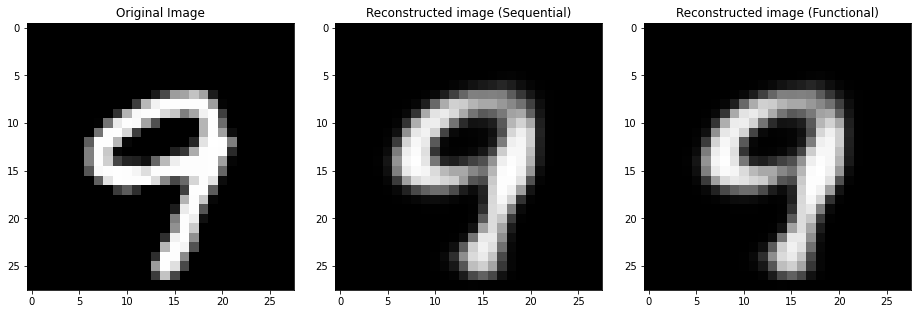

In [30]:
# plotting original vs reconstructed
index = 58

_, ax = plt.subplots(1,3,figsize=(13,13))
_.tight_layout()

# display prediction of fitted Sequential implementation vs original data
ax[0].imshow(x_test[index], cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(result[0][index,:].reshape((28,28)), cmap = 'gray') # reconstruction of the model (how the latest layer looks like)
ax[1].title.set_text('Reconstructed image (Sequential)')

# display prediction of fitted Functional implementation vs original data
ax[2].imshow(result[1][index,:].reshape((28,28)), cmap = 'gray')
ax[2].title.set_text('Reconstructed image (Functional)')

### 5.3 What happens with random noise?

In [31]:
# generate random vector
new_input = np.random.rand(1,28*28)

In [32]:
# model prediction
pred_sequential = autoencoder_sequential.predict(new_input)
pred_functional = autoencoder_functional.predict(new_input)

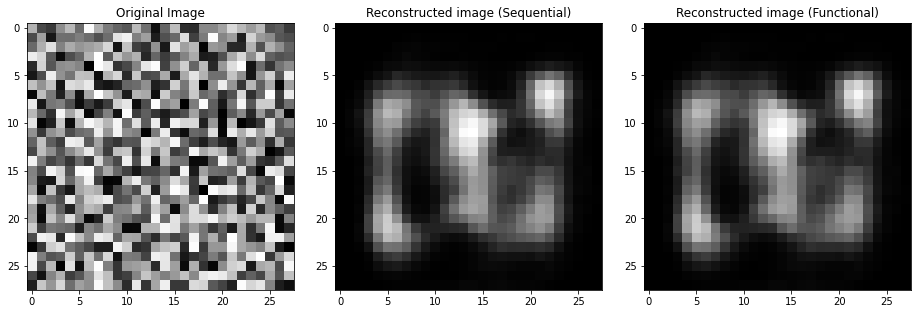

In [33]:
_, ax = plt.subplots(1,3,figsize=(13,13))
_.tight_layout()

ax[0].imshow(new_input.reshape((28,28)), cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(pred_sequential.reshape((28,28)), cmap='gray') # what the model reconstructs
ax[1].title.set_text('Reconstructed image (Sequential)')
ax[2].imshow(pred_functional.reshape((28,28)), cmap='gray')
ax[2].title.set_text('Reconstructed image (Functional)')